,ім’я файлу,кольорова модель,формат,кількість каналів,розмір файлу (МБ),ширина,висота,повний шлях,зменшене зображення
0,JPEG1.jpg,RGB,JPEG,3,0.40,1280,852,C:/Users/yaros/Downloads/lab4ex\JPEG1.jpg,
1,JPEG2.jpg,RGB,JPEG,3,0.20,1280,851,C:/Users/yaros/Downloads/lab4ex\JPEG2.jpg,
2,JPEG3.jpg,RGB,JPEG,3,0.43,1280,803,C:/Users/yaros/Downloads/lab4ex\JPEG3.jpg,
3,JPEG4.jpg,RGB,JPEG,3,0.26,1280,851,C:/Users/yaros/Downloads/lab4ex\JPEG4.jpg,
4,JPEG5.jpg,RGB,JPEG,3,0.50,1280,960,C:/Users/yaros/Downloads/lab4ex\JPEG5.jpg,
5,JPEG6.jpg,RGB,JPEG,3,0.21,1280,853,C:/Users/yaros/Downloads/lab4ex\JPEG6.jpg,
6,JPEG8.jpg,RGB,JPEG,3,0.33,1280,518,C:/Users/yaros/Downloads/lab4ex\JPEG8.jpg,
7,PNG1.png,RGBA,PNG,4,1.73,2048,1200,C:/Users/yaros/Downloads/lab4ex\PNG1.png,
8,PNG2.png,RGBA,PNG,4,1.13,1822,776,C:/Users/yaros/Downloads/lab4ex\PNG2.png,
9,PNG3.png,RGBA,PNG,4,0.80,1280,960,C:/Users/yaros/Downloads/lab4ex\PNG3.png,

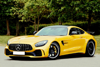
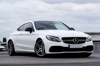
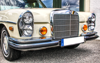
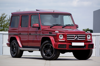
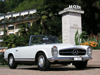
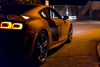
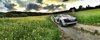
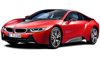
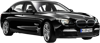
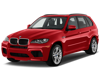
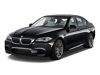
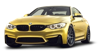
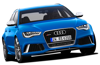
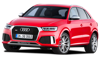
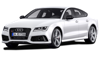

In [24]:
import pandas as pd
import os
import zipfile
from PIL import Image
from IPython.display import display, HTML
import io
import base64

# Розпакування архіву
zip_path = 'C:/Users/yaros/Downloads/imagesLab4.zip'
extract_path = 'C:/Users/yaros/Downloads/lab4ex'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Функція для збору інформації про зображення
def get_image_info(directory):
    data = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    # Отримання необхідної інформації
                    color_model = img.mode
                    img_format = img.format
                    channels = len(img.getbands())
                    size_mb = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                    width, height = img.size
                    # Створення зменшеного зображення
                    img.thumbnail((100, 100))
                    # Конвертація зменшеного зображення в HTML формат
                    buffer = io.BytesIO()
                    img.save(buffer, format="PNG")
                    img_str = base64.b64encode(buffer.getvalue()).decode()
                    img_html = f'<img src="data:image/png;base64,{img_str}" width="80"/>'
                    
                    # Додавання даних у список
                    data.append({
                        'ім’я файлу': file,
                        'кольорова модель': color_model,
                        'формат': img_format,
                        'кількість каналів': channels,
                        'розмір файлу (МБ)': size_mb,
                        'ширина': width,
                        'висота': height,
                        'повний шлях': file_path,
                        'зменшене зображення': img_html
                    })
    return pd.DataFrame(data)

# Створення DataFrame 
image_df = get_image_info(extract_path)

# Відображення таблиці з допомогою HTML
display(HTML(image_df.to_html(escape=False)))



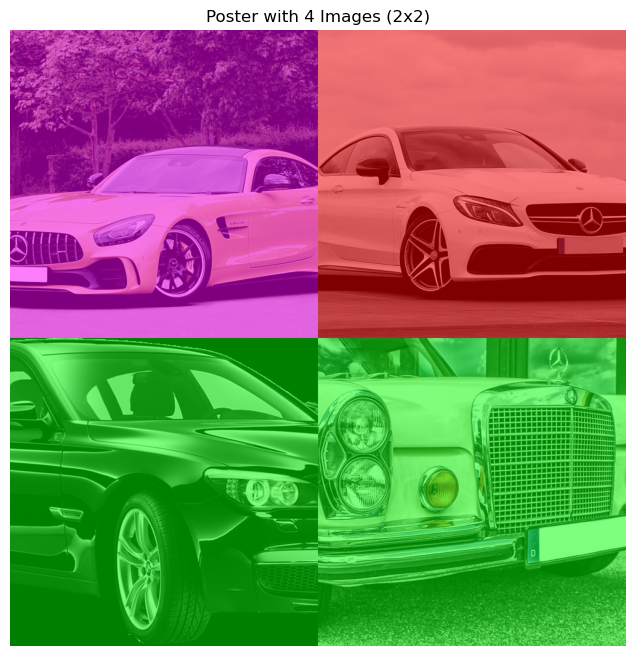

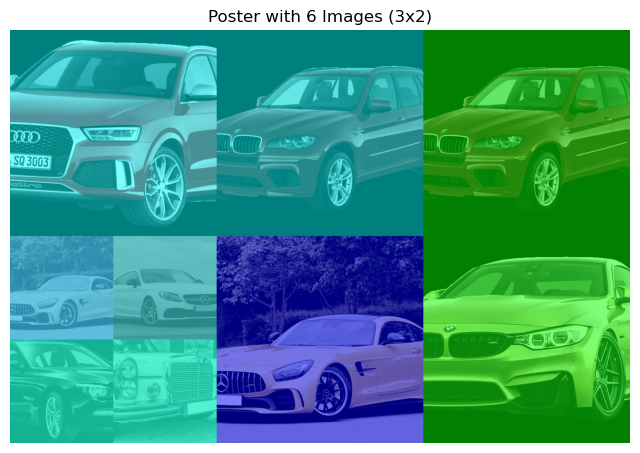

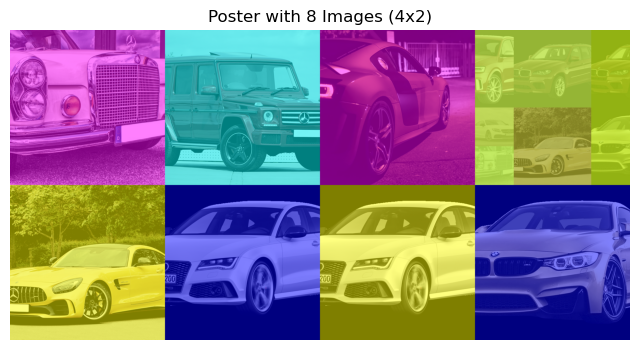

In [36]:
import os
import random
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

# Функція для обрізки зображення до квадрату
def crop_to_square(img):
    width, height = img.size
    new_side = min(width, height)
    left = (width - new_side) // 2
    top = (height - new_side) // 2
    right = (width + new_side) // 2
    bottom = (height + new_side) // 2
    return img.crop((left, top, right, bottom))

# Функція для застосування випадкового кольорового фільтру
def apply_random_filter(img):
    # кольори для фільтрів
    filters = {
        "red": (1, 0, 0),
        "green": (0, 1, 0),
        "blue": (0, 0, 1),
        "yellow": (1, 1, 0),
        "magenta": (1, 0, 1),
        "cyan": (0, 1, 1),
    }
    
    # Обрання випадкового фільтру
    filter_color = random.choice(list(filters.values()))
    
    if img.mode != "RGB":
        img = img.convert("RGB")
    
    # Створення зображення з кольоровим фільтром того ж розміру, що і вхідне зображення
    color_overlay = Image.new("RGB", img.size, tuple([int(255 * c) for c in filter_color]))
    
    # Зменшення насиченості оригінального зображення
    colored_img = ImageEnhance.Color(img).enhance(0.5)
    
    # Накладання фільтру
    return Image.blend(colored_img, color_overlay, 0.5)


# Функція для створення постера
def create_poster(directory, output_name, num_cols, num_rows, img_size=(500, 500)):
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Ініціалізація порожнього постера
    poster_width = img_size[0] * num_cols
    poster_height = img_size[1] * num_rows
    poster = Image.new("RGB", (poster_width, poster_height))
    
    for row in range(num_rows):
        for col in range(num_cols):
            # Вибір випадкового зображення та застосування обробки
            random_img_path = random.choice(image_files)
            img = Image.open(random_img_path)
            img = crop_to_square(img)
            img = img.resize(img_size)
            img = apply_random_filter(img)
            
            # Розміщення обробленого зображення в постері
            x = col * img_size[0]
            y = row * img_size[1]
            poster.paste(img, (x, y))
    
    # Збереження та повернення постера
    poster.save(output_name)
    return poster

# Декілька прикладів постерів
output_folder = 'C:/Users/yaros/Downloads/lab4ex'
num_images = [4, 6, 8]
for i, count in enumerate(num_images, start=1):
    cols = count // 2
    rows = 2
    output_path = os.path.join(output_folder, f'poster_{count}_images.jpg')
    poster = create_poster(extract_path, output_path, cols, rows)
    
    # Виведення результату
    plt.figure(figsize=(8, 8))
    plt.imshow(poster)
    plt.axis('off')
    plt.title(f'Poster with {count} Images ({cols}x{rows})')
    plt.show()
